У цьому домашньому завданні ми продовжуємо працювати з набором даних `Yulu`, з яким почали працювати в "hw 4.3. Робота з DataFrame. Діаграма розсіювання.". Фокус цього ДЗ в тому, аби будувати візуалізації використовуючи методи pandas.DataFrame. Це дозволяє будувати візуалізації ще швидше.

Документація до тої частини бібліотеки, з якою тут працюємо

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

### Профіль колонок набору даних:

- **datetime**: дата та час зібрані погодинно
- **season**: сезон (1: весна, 2: літо, 3: осінь, 4: зима)
- **holiday**: чи є день святковим (витягнуто з http://dchr.dc.gov/page/holiday-schedule)
- **workingday**: якщо день не є вихідним або святковим, то позначається як 1, в іншому випадку – 0.
- **weather**:
  1. Ясно, Мало хмарно, частково хмарно
  2. Туман + Хмарно, Туман + Розірвані хмари, Туман + Мало хмарно, Туман
  3. Легкий сніг, Легкий дощ + Гроза + Розсіяні хмари, Легкий дощ + Розсіяні хмари
  4. Сильний дощ + Крижані кулі + Гроза + Туман, Сніг + Туман
- **temp**: температура в градусах Цельсія
- **atemp**: як відчувається температура в градусах Цельсія
- **humidity**: вологість
- **windspeed**: швидкість вітру
- **casual**: кількість неформальних користувачів
- **registered**: кількість зареєстрованих користувачів
- **count**: загальна кількість велосипедів, взятих в оренду, включаючи неформальних та зареєстрованих користувачів

0. Імпортуйте бібліотеки `matplotlib.pyplot` та `pandas`.  Завантажте дані з файла yulu_rental.csv у pandas.DataFrame df.

In [3]:
import numpy as np
import pandas as pd

In [6]:
from matplotlib import pyplot as plt

In [9]:
%matplotlib inline

In [12]:
import os
os.listdir()

['figure_2.png',
 'figure_3.png',
 'figure_1.png',
 'my_figure.png',
 'hw_4_3_Робота_з_DataFrame_Діаграма_розсіювання.ipynb',
 'Lecture_4_Data_Visualisation.ipynb',
 'hw_4_1_Базові_візуалізації.ipynb',
 '.ipynb_checkpoints',
 'hw_4_2_Базові_візуалізації_Продовження.ipynb',
 'hw_4_4_Візуалізація_з_pandas.ipynb']

In [15]:
os.listdir('../data/')

['.DS_Store',
 'health_insurance_cross_sell_prediction.csv',
 'yulu_rental.csv',
 'supermarket_sales.csv']

In [18]:
data_path = '../data/yulu_rental.csv'
df = pd.read_csv(data_path)
df.head(7)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2


1.1. Користуючись групою методів `pandas.plot` побудуйте гістограму кількості зареєстрованих користувачів з налаштуваннями за замовченням (тобто без жодних додаткових параметрів).

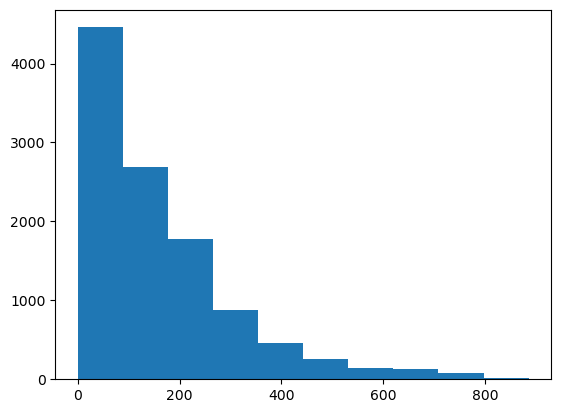

In [37]:
data = df['registered'] #або df['registered'].plot(kind='hist', title='Гістограма кількості зареєстрованих користувачів')
plt.hist(data)
#plt.grid(axis='both', alpha=.3);

# Показуємо графік
#plt.xlabel('Кількість зареєстрованих користувачів')
#plt.ylabel('Частота')
plt.show()

1.2. Побудуйте гістограму для цього ж показника, але задайте кількість бінів рівну 30 і задайте прозорість 0.5. Додайте підписи за осями ОХ і ОУ, а також назву дівграмі. Опишіть свої спостереження. Що бачите? Чому дані можуть мати такий розподіл?

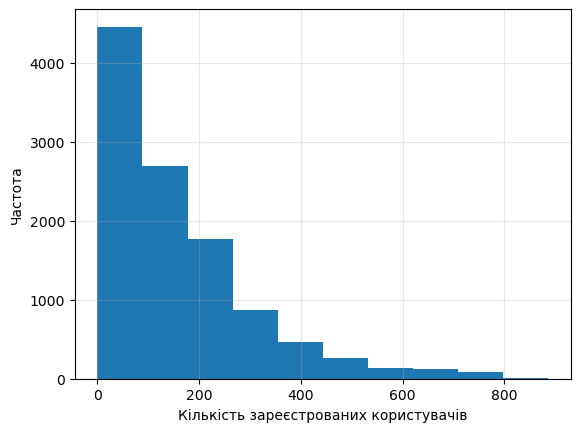

In [39]:
data = df['registered'] #або df['registered'].plot(kind='hist', title='Гістограма кількості зареєстрованих користувачів')
plt.hist(data)
plt.grid(axis='both', alpha=.3);

# Показуємо графік
plt.xlabel('Кількість зареєстрованих користувачів')
plt.ylabel('Частота')
plt.show()

Має вийти щось таке (може бути без сітки):

![](https://drive.google.com/uc?export=view&id=1Pb3UD8cmg_V0LLf8A4feOepTDXMqEAf8)


--------

Перетворимо колонку `datetime` на тип даних `pd.datetime` - це нам доопоможе в подальшій роботі. Просто запустіть колонку нижче і занатуйте собі цей метод роботи з колонкою, в якій міститься дата і час.

In [41]:
df['datetime'] = pd.to_datetime(df.datetime)

І створимо нову колонку `dayofweek` для того, аби дослідити детальніше, коли у нас немає поїздок.

In [43]:
df['dayofweek'] = df.datetime.dt.day_of_week

Переглянемо значення в колонкці. Колонка dayofweek містить числа від 0 до 6 включно, де 0 відповідає понеділку.

In [45]:
df[['datetime','dayofweek']][df.dayofweek==0].head()

,datetime,dayofweek
47,2011-01-03 00:00:00,0
48,2011-01-03 01:00:00,0
49,2011-01-03 04:00:00,0
50,2011-01-03 05:00:00,0
51,2011-01-03 06:00:00,0


2. Проведемо аналіз нульової активності зареєстрованих користувачів за днями тижня. Для цього
  1. Виберіть з набору даних усі записи, де кількість зареєстрованих користувачів дорівнює 0. Групуйте ці записи за днями тижня (`dayofweek`) та обчисліть кількість нульових записів для кожного дня.
  2. Після групування, використайте графік типу "bar" для візуалізації результатів. Кожна смужка на графіку має відображати кількість записів у даних для цього дня тижня, коли не було зареєстровано жодної поїздки користувачами.

In [51]:
 #Вибір записів, де registered == 0
zero_registered = df[df['registered'] == 0]
zero_registered

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,dayofweek
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2,5
210,2011-01-10 01:00:00,1,0,1,1,4.92,6.060,50,19.0012,1,0,1,0
456,2011-02-02 02:00:00,1,0,1,3,9.02,11.365,93,8.9981,4,0,4,2
905,2011-03-02 04:00:00,1,0,1,1,8.20,10.605,75,8.9981,1,0,1,2
953,2011-03-04 04:00:00,1,0,1,2,7.38,9.090,74,12.9980,1,0,1,4
1023,2011-03-07 04:00:00,1,0,1,1,8.20,7.575,80,35.0008,1,0,1,0
1045,2011-03-08 02:00:00,1,0,1,1,9.84,12.120,52,8.9981,1,0,1,1
1091,2011-03-10 00:00:00,1,0,1,3,13.94,15.910,0,16.9979,3,0,3,3
1375,2011-04-03 04:00:00,2,0,0,1,11.48,15.150,70,6.0032,3,0,3,6
1398,2011-04-04 03:00:00,2,0,1,1,15.58,19.695,66,19.0012,1,0,1,0


In [53]:

# Групування за днями тижня та підрахунок кількості записів
zero_by_day = zero_registered.groupby('dayofweek').size()
zero_by_day


dayofweek
0    5
1    3
2    2
3    1
4    1
5    1
6    2
dtype: int64

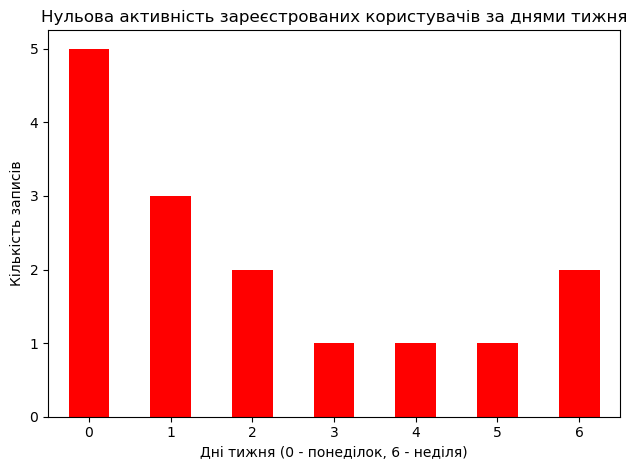

In [57]:
# Побудова стовпчикового графіка
zero_by_day.plot(kind='bar', color='r', title='Нульова активність зареєстрованих користувачів за днями тижня')
plt.xlabel('Дні тижня (0 - понеділок, 6 - неділя)')
plt.ylabel('Кількість записів')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1FXNzMa7rTdBQDwXSQfPTtPX5CHZK9A4X)

3. Проведемо аналіз загальної кількості зареєстрованих покристувачів за різними погодними умовами.
Згрупуйте всі дані за погодними умовами і визначте суму кількості зареєстрованих користувачів для кожної погодньої умови.
Побудуйте стовпачасту діаграму, які відобразить результат обчислень.
Зверніться до опису даних та дайте відповідь: чи побудована візуалізація має логічний сенс з точки зору опису даних.

In [87]:
# Групування за погодними умовами та сума загальної кількості зареєстрованих к-чів
registered_by_weather = df.groupby('weather')['registered'].sum()

registered_by_weather

weather
1    1186163
2     419914
3      87106
4        158
Name: registered, dtype: int64

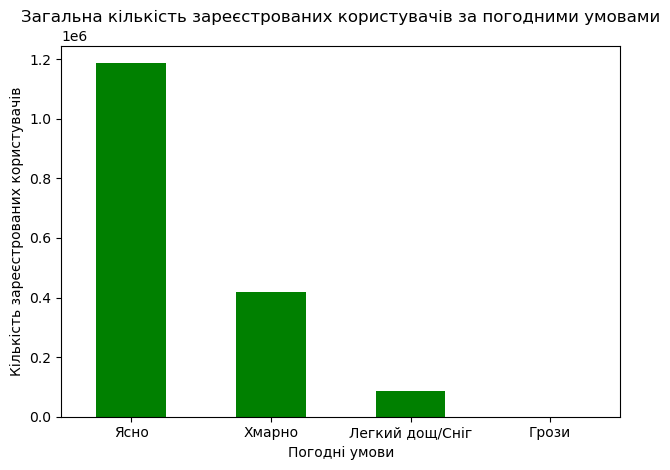

In [103]:
# Побудова стовпчастої діаграми
registered_by_weather.plot(kind='bar', color='green', title='Загальна кількість зареєстрованих користувачів за погодними умовами')
plt.xlabel('Погодні умови')
plt.ylabel('Кількість зареєстрованих користувачів')

# Підпис осі X із детальними позначеннями
plt.xticks(
    ticks=range(len(registered_by_weather)),  # Індекси категорій
    labels=[
        "Ясно", 
        "Хмарно", 
        "Легкий дощ/Сніг", 
        "Грози"
    ],
    rotation=0  # Горизонтальне розташування міток
)

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Висновок: Хороша погода сприяє активному використанню велосипедів. Ще раз акцент на сезонність. Аномалій не простежується

4. Користуючись групою методів pandas.plot побудуйте діаграму розсіювання (scatter plot) між вологістю і кількістю зареєстрованих користувачів. Встановіть прозорість на 0.5, а також налаштуйте діаграму так, аби колір кожної точки відповідав значенню температури за відчуттями (`atemp`).

Проаналізуйте графік, що спостерігаєте?

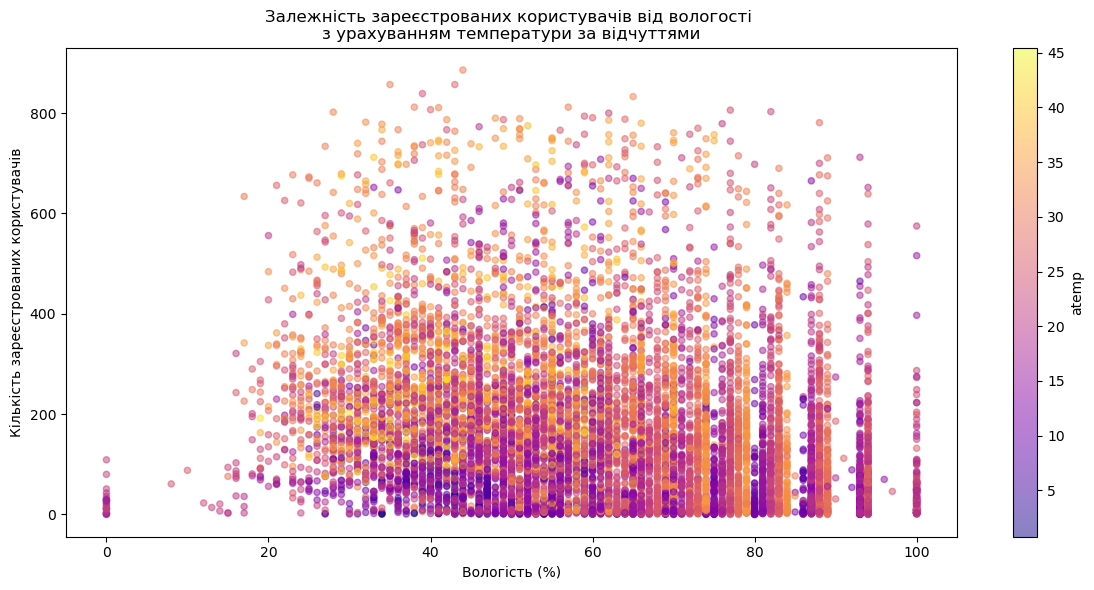

In [107]:
df.plot.scatter(
    x='humidity',                
    y='registered',              
    c='atemp',                   
    colormap='plasma',          
    alpha=0.5,                   
    figsize=(12, 6),             # Розмір графіка
    title="Залежність зареєстрованих користувачів від вологості \nз урахуванням температури за відчуттями"
)

plt.xlabel('Вологість (%)')
plt.ylabel('Кількість зареєстрованих користувачів')

plt.tight_layout()
plt.show()


Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1trepX8z23YwyP9P8cAko9IzwOZkvLo8y)

Бачимо outlier при 0% вологості та 100%. При відчутті температури як такої від 10 до 29 одиниць найбільша частка зареєстрованих користувачів.